In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py as h5
import glob
import scipy
from tqdm.auto import tqdm

In [2]:
def killing_norm(gen):
    return (gen.shape[-1]-2)*np.trace(gen@gen,axis1=1, axis2=2)
def normalise(gen):
    return gen/np.sqrt(-1*killing_norm(gen))[:,None,None]

In [3]:
order = 5

In [5]:
file_lg = glob.glob(f"./LieGan/ExperimentWeights/{order}_*")

In [6]:
file_sr = glob.glob(f"./SymReg/ExperimentWeights/result_SO_{order}*")

In [7]:
generator_lg = list(map(lambda f: np.load(f),file_lg))
generator_sr = list(map(lambda f: np.transpose(h5.File(f,"r")["Group"]["Generator"][:],[-1,1,0]),file_sr))
#Generator_idx, dim1, dim2

In [8]:
# normalising the generators
generator_lg = list(map(lambda f: normalise(f),generator_lg))
generator_sr = list(map(lambda f: normalise(f),generator_sr))

/tmp/ipykernel_1467990/435792498.py:4: RuntimeWarning: invalid value encountered in sqrt
  return gen/np.sqrt(-1*killing_norm(gen))[:,None,None]


In [9]:
## To the degree of error of these generators we will follow the following procedure:
# 1. Normalise the generator such that Ji = Ji/det(Ji)
# 2. Sample a random vector of dim dimension from the distribution of (-1,1)
# 3. Iterate from Theta (-1,1) and show the closure error

In [10]:
all_gen_lg = np.array(generator_lg).reshape(-1,order,order)
all_gen_lg = all_gen_lg[~np.isnan(all_gen_lg.reshape(-1,order*order)).any(1)]
all_gen_sr = np.array(generator_sr).reshape(-1,order,order)
all_gen_sr = all_gen_sr[~np.isnan(all_gen_sr.reshape(-1,order*order)).any(1)]

In [11]:
sample = 2*np.random.randn(256,order)-1

In [12]:
angles = np.arange(-1,1,0.05)

mean_errors_sr = []
mean_errors_lg = []

std_errors_sr = []
std_errors_lg = []

y = np.sum(sample**2,1)

for i in tqdm(angles):

    e_sr = []
    e_lg = []
    
    for j in range(all_gen_lg.shape[0]):
        gen_lg = scipy.linalg.expm(all_gen_lg[j]*i)
        transform_lg = sample@gen_lg
        y_tran_lg = np.sum(transform_lg**2,1)
        e_lg.append(np.mean((y - y_tran_lg)**2))


    for j in range(all_gen_sr.shape[0]):
        gen_sr = scipy.linalg.expm(all_gen_sr[j]*i)
        transform_sr = sample@gen_sr
        y_tran_sr = np.sum(transform_sr**2,1)
        e_sr.append(np.mean((y - y_tran_sr)**2))
    
    mean_errors_sr.append(np.median(np.array(e_sr)))
    mean_errors_lg.append(np.median(np.array(e_lg)))

    std_errors_sr.append(np.array(e_sr).std())
    std_errors_lg.append(np.array(e_lg).std())
    # std_error.append(error_in_y.std())

  0%|          | 0/40 [00:00<?, ?it/s]

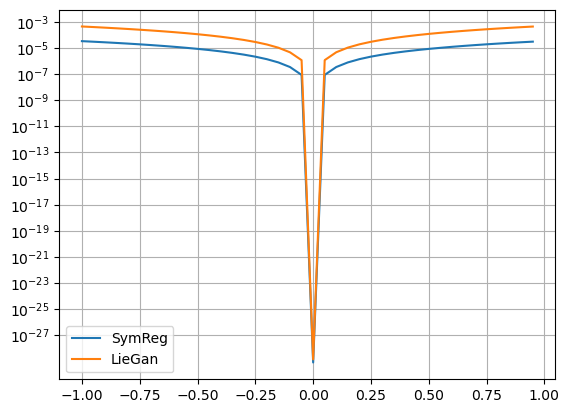

In [13]:
plt.plot(angles,mean_errors_sr, label = "SymReg")
plt.plot(angles,mean_errors_lg , label = "LieGan")
plt.yscale("log")
plt.yticks(10.0**(-1*np.arange(3,28,2)))
plt.grid()
plt.legend()

In [4]:
## Comparing across orders
order = [3,4,5]
dict_results = {}
for order in [3,4,5]:
    
    
    dict_results[order] = {}
    
    file_lg = glob.glob(f"./LieGan/ExperimentWeights/{order}_*")
    file_sr = glob.glob(f"./SymReg/ExperimentWeights/result_SO_{order}*")
    generator_lg = list(map(lambda f: np.load(f),file_lg))
    generator_sr = list(map(lambda f: np.transpose(h5.File(f,"r")["Group"]["Generator"][:],[-1,1,0]),file_sr))
    # normalising the generators
    generator_lg = list(map(lambda f: normalise(f),generator_lg))
    generator_sr = list(map(lambda f: normalise(f),generator_sr))
    #clean-up
    all_gen_lg = np.array(generator_lg).reshape(-1,order,order)
    all_gen_lg = all_gen_lg[~np.isnan(all_gen_lg.reshape(-1,order*order)).any(1)]
    all_gen_sr = np.array(generator_sr).reshape(-1,order,order)
    all_gen_sr = all_gen_sr[~np.isnan(all_gen_sr.reshape(-1,order*order)).any(1)]
    
    angles = np.arange(-1,1,0.05)
    sample = 2*np.random.randn(256,order)-1
    
    mean_errors_sr = []
    mean_errors_lg = []
    
    std_errors_sr = []
    std_errors_lg = []
    
    y = np.sum(sample**2,1)
    
    for i in tqdm(angles):
    
        e_sr = []
        e_lg = []
        
        for j in range(all_gen_lg.shape[0]):
            gen_lg = scipy.linalg.expm(all_gen_lg[j]*i)
            transform_lg = sample@gen_lg
            y_tran_lg = np.sum(transform_lg**2,1)
            e_lg.append(np.mean((y - y_tran_lg)**2))
    
    
        for j in range(all_gen_sr.shape[0]):
            gen_sr = scipy.linalg.expm(all_gen_sr[j]*i)
            transform_sr = sample@gen_sr
            y_tran_sr = np.sum(transform_sr**2,1)
            e_sr.append(np.mean((y - y_tran_sr)**2))
        
        mean_errors_sr.append(np.median(np.array(e_sr)))
        mean_errors_lg.append(np.median(np.array(e_lg)))
    
        std_errors_sr.append(np.array(e_sr).std())
        std_errors_lg.append(np.array(e_lg).std())
    
    dict_results[order]["mean_errors_sr"] = mean_errors_sr
    dict_results[order]["mean_errors_lg"] = mean_errors_lg
    dict_results[order]["std_errors_sr"] = std_errors_sr
    dict_results[order]["std_errors_lg"] = std_errors_lg

/tmp/ipykernel_1574835/435792498.py:4: RuntimeWarning: invalid value encountered in sqrt
  return gen/np.sqrt(-1*killing_norm(gen))[:,None,None]


  0%|          | 0/40 [00:00<?, ?it/s]

/tmp/ipykernel_1574835/435792498.py:4: RuntimeWarning: invalid value encountered in sqrt
  return gen/np.sqrt(-1*killing_norm(gen))[:,None,None]


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

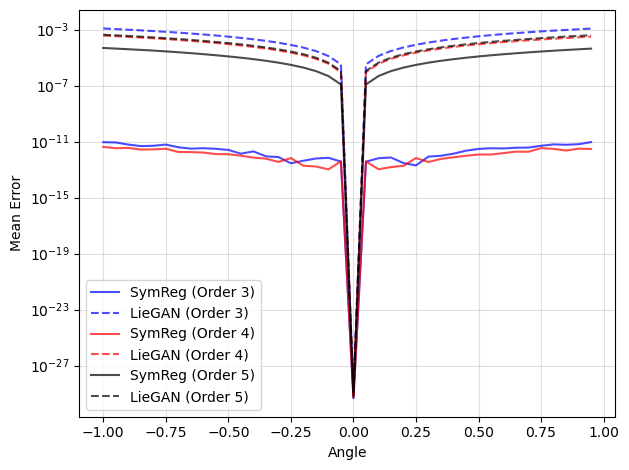

In [5]:
order_list = [3,4,5]
colors = ['blue', 'red', 'black']  # same colors for both models, per order

for i, order in enumerate(order_list):
    # SymReg
    plt.plot(
        angles,
        dict_results[order]["mean_errors_sr"],
        color=colors[i],
        linestyle='-',
        label=f"SymReg (Order {order})",
        alpha = 0.7,
    )

    plt.plot(
        angles,
        dict_results[order]["mean_errors_lg"],
        color=colors[i],
        linestyle='--',
        label=f"LieGAN (Order {order})",
        alpha = 0.7,
    )

plt.grid(alpha=0.4)
plt.xlabel("Angle")
plt.ylabel("Mean Error")
plt.yscale("log")
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
## Rotation 

In [17]:
file_lg = glob.glob(f"./LieGan/ExperimentWeights/{order}_*")


In [18]:
vector =  np.array([0,0,1])
order = 3
file_lg = glob.glob(f"./LieGan/ExperimentWeights/{order}_*")
file_sr = glob.glob(f"./SymReg/ExperimentWeights/result_SO_{order}*")
generator_lg = list(map(lambda f: np.load(f),file_lg))
generator_sr = list(map(lambda f: np.transpose(h5.File(f,"r")["Group"]["Generator"][:],[-1,1,0]),file_sr))
generator_lg = list(map(lambda f: normalise(f),generator_lg))
generator_sr = list(map(lambda f: normalise(f),generator_sr))


/tmp/ipykernel_1467990/435792498.py:4: RuntimeWarning: invalid value encountered in sqrt
  return gen/np.sqrt(-1*killing_norm(gen))[:,None,None]


In [19]:
#We choose any run
generator_lg = generator_lg[0]
generator_sr = generator_sr[0]

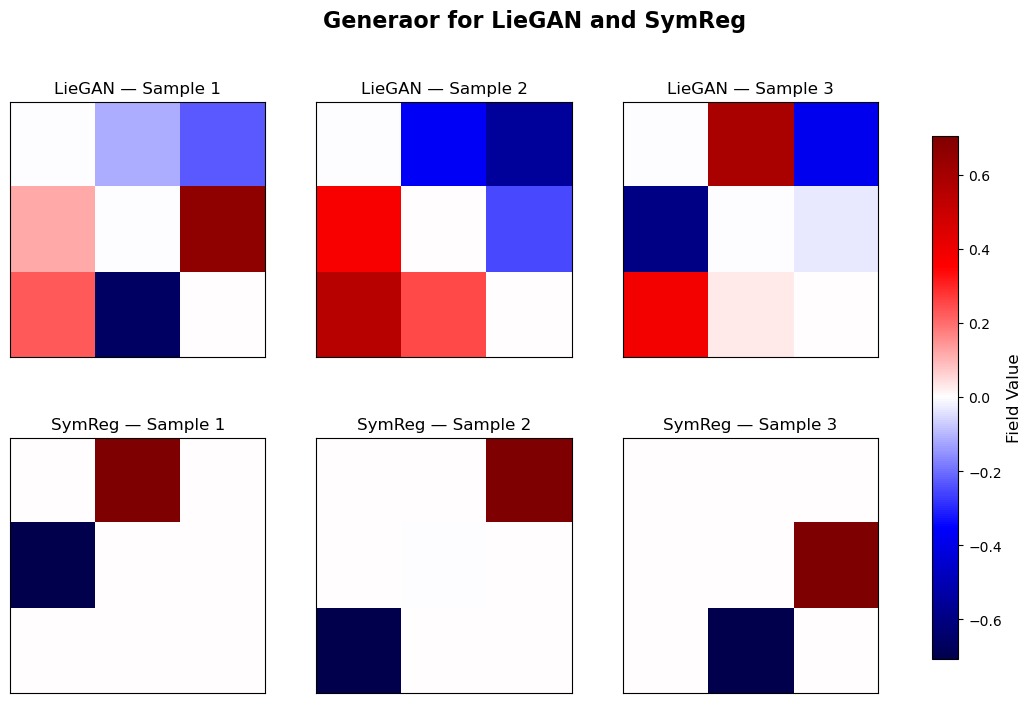

In [191]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
cmap = "seismic"

vmin = min(np.min(generator_lg), np.min(generator_sr))
vmax = max(np.max(generator_lg), np.max(generator_sr))


for i in range(3):
    im = axes[0, i].imshow(generator_lg[i], cmap=cmap, vmin=vmin, vmax=vmax)
    axes[0, i].set_title(f"LieGAN — Sample {i+1}", fontsize=12)
    axes[0, i].set_xticks([]); axes[0, i].set_yticks([])


for i in range(3):
    axes[1, i].imshow(generator_sr[i], cmap=cmap, vmin=vmin, vmax=vmax)
    axes[1, i].set_title(f"SymReg — Sample {i+1}", fontsize=12)
    axes[1, i].set_xticks([]); axes[1, i].set_yticks([])

cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.85)
cbar.set_label("Field Value", fontsize=12)

fig.suptitle("Generaor for LieGAN and SymReg", fontsize=16, weight="bold")

plt.show()


In [83]:
vectors_sr

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-2.73685805e-12, -4.15789668e-12,  1.00000000e+00],
       [-5.47077531e-12, -8.31772758e-12,  1.00000000e+00],
       ...,
       [-1.01595787e-09, -5.29368283e-09,  9.99999881e-01],
       [-1.01494890e-09, -5.29855892e-09,  9.99999881e-01],
       [-1.01394082e-09, -5.30343280e-09,  9.99999881e-01]])

In [169]:
vector =  np.array([1,1,1])
vect_list_lg = []
vect_list_sr = []

angles = np.arange(0,10000,0.5)
for i in tqdm(angles):
    gen_lg = scipy.linalg.expm(generator_lg[0]*i)
    gen_sr = scipy.linalg.expm(generator_sr[1]*i)
    vect_list_lg.append(vector@gen_lg)
    vect_list_sr.append(vector@gen_sr)
    # gen_lg = scipy.linalg.expm(generator_lg[0]*(i+0.1))
    # vect_list_lg.append(vector@gen_lg)

  0%|          | 0/20000 [00:00<?, ?it/s]

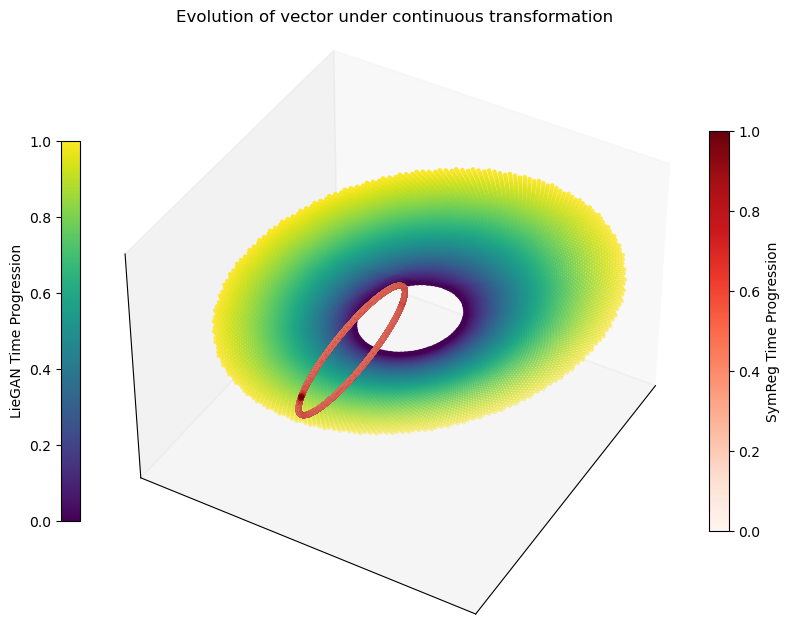

In [190]:
vectors_lg = np.asarray(vect_list_lg)
vectors_sr = np.asarray(vect_list_sr)

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

colors_lg = np.linspace(0, 1, len(vectors_lg))
colors_sr = np.linspace(0, 1, len(vectors_sr))

lg = ax.scatter(vectors_lg[:,0], vectors_lg[:,1], vectors_lg[:,2],
                c=colors_lg, cmap='viridis', s=5)

sr = ax.scatter(vectors_sr[:,0], vectors_sr[:,1], vectors_sr[:,2],
                c=colors_sr, cmap='Reds', s=10)

# Clean axes: no ticks, no labels
ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
ax.set_xlabel(""); ax.set_ylabel(""); ax.set_zlabel("")

# Camera view
ax.view_init(elev=40, azim=210,)

cbar_sr = fig.colorbar(sr, ax=ax, fraction=0.03, pad=0.02, location='right')
cbar_sr.set_label("SymReg Time Progression")

# Second colorbar (bottom)
cbar_lg = fig.colorbar(lg, ax=ax, fraction=0.03, pad=0.02, location='left')
cbar_lg.set_label("LieGAN Time Progression")

plt.tight_layout()
plt.title("Evolution of vector under continuous transformation")
plt.show()
